# Author: Ayush Kakar

 #  DATASET : Machine Learning “S&P 500 stock data” 




# Importing all the necessary libraries


In [14]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import seaborn as sns

%matplotlib inline

# Reading the dataset

In [8]:
df = pd.read_csv('AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [9]:

df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


# Cleaning the data


In [11]:
df.drop(['Name'],axis=1,inplace=True)
df

,date,open,high,low,close,volume
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154
...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838


In [12]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

<AxesSubplot:>

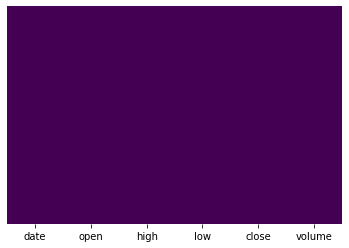

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# Find Missing Values


In [15]:
df.open.fillna(df.open.mean(),inplace=True)
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [19]:
df.high.fillna(value=0,inplace=True)
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [20]:
df.low.fillna(value=0,inplace=True)
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

#  Visualizing the stock price

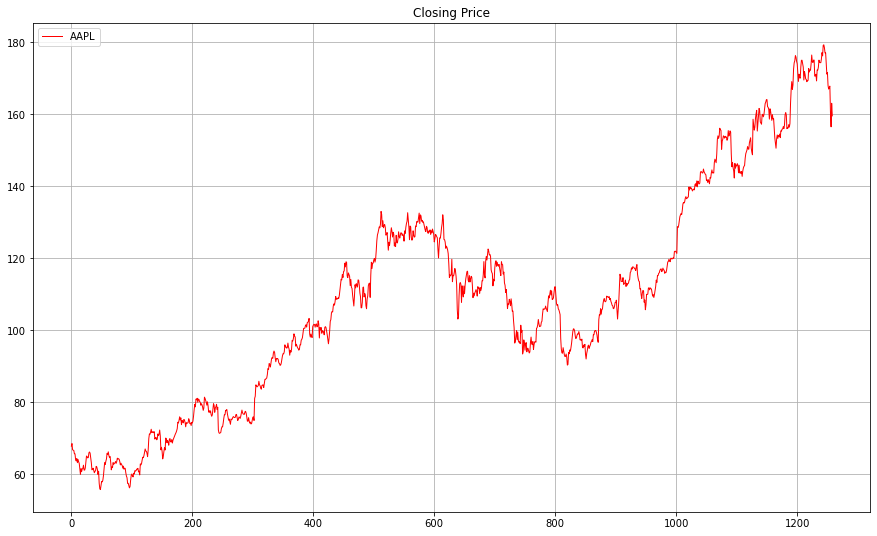

In [24]:


df[ 'close'].plot(label='AAPL', figsize=(15, 9), title='Closing Price', color='red', linewidth=1.0, grid=True)
plt.legend()

In [25]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col = df['close']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

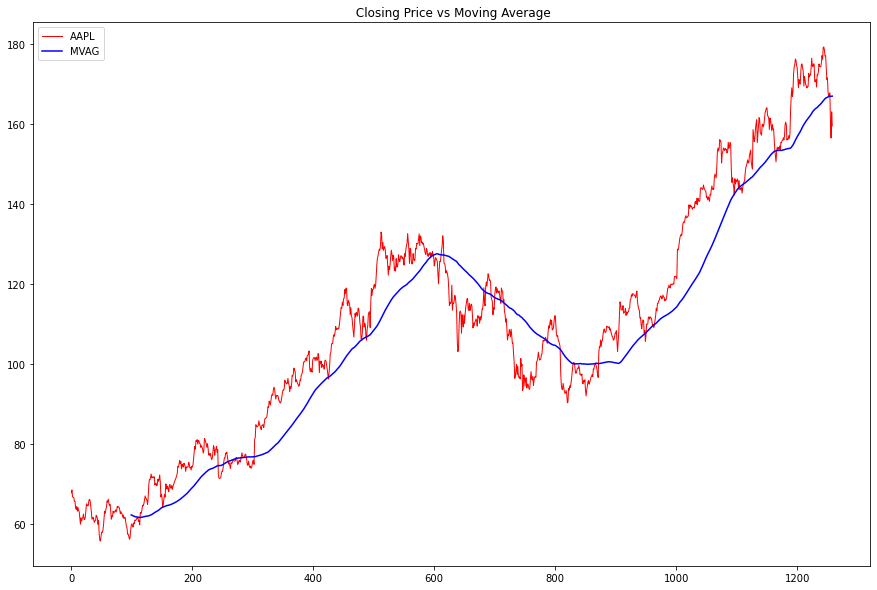

In [26]:
# Visualizing Rolling Mean and Adjusted Closing Price together

df['close'].plot(label='AAPL', figsize=(15,10), title=' Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

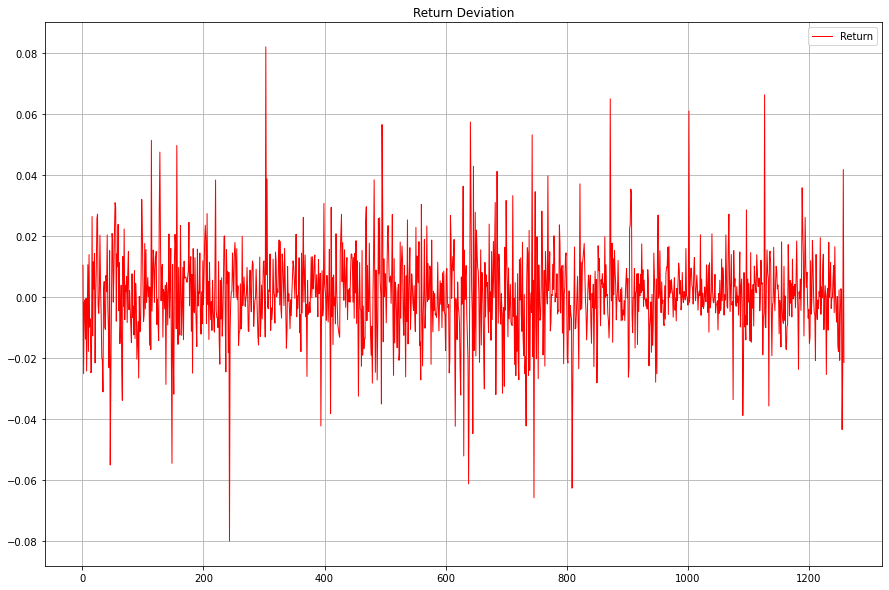

In [27]:
# Return Deviation measures the Mean of the Probability Distribution of Investment Returns if it has a positive/negative Average Net Outcome

rd = close_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(15, 10), title='Return Deviation', color='red', linewidth=1.0, grid=True)
plt.legend()

In [28]:
# Number of days for which to predict the stock prices

predict_days = 30

In [31]:
# Shifting by the Number of Predict days for Prediction array

df['Prediction'] = df['close'].shift(-predict_days)
# print(df['Prediction'])
# print(df['close'])

In [32]:

# Dropping the Prediction Row

X = np.array(df.drop(['Prediction'], axis = 1))
X = X[:-predict_days]      # Size upto predict days
# print(X)
print(X.shape)

(1229, 6)


In [33]:
# Creating the Prediction Row

y = np.array(df['Prediction'])
y = y[:-predict_days]      # Size upto predict_days
# print(y)
print(y.shape)

(1229,)


# Splitting the data into Training data & Testing data


In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(983, 6)
(983,)
(246, 6)
(246,)


In [35]:
X = df.drop(columns=['close','date'])
y = df['close']
X

,open,high,low,volume,Prediction
0,67.7142,68.4014,66.8928,158168416,66.2256
1,68.0714,69.2771,67.6071,129029425,65.8765
2,68.5014,68.9114,66.8205,151829363,64.5828
3,66.7442,67.6628,66.1742,118721995,63.2371
4,66.3599,67.3771,66.2885,88809154,61.2728
...,...,...,...,...,...
1254,167.1650,168.6200,166.7600,47230787,NaN
1255,166.0000,166.8000,160.1000,86593825,NaN
1256,159.1000,163.8800,156.0000,72738522,NaN
1257,154.8300,163.7200,154.0000,68243838,NaN


# Training the model and performing  Linear Regression

In [41]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [42]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['close']

In [43]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.07378983276016055
Intercept:  62.47923361980555


<ipython-input-44-f46d15fbfb1c>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


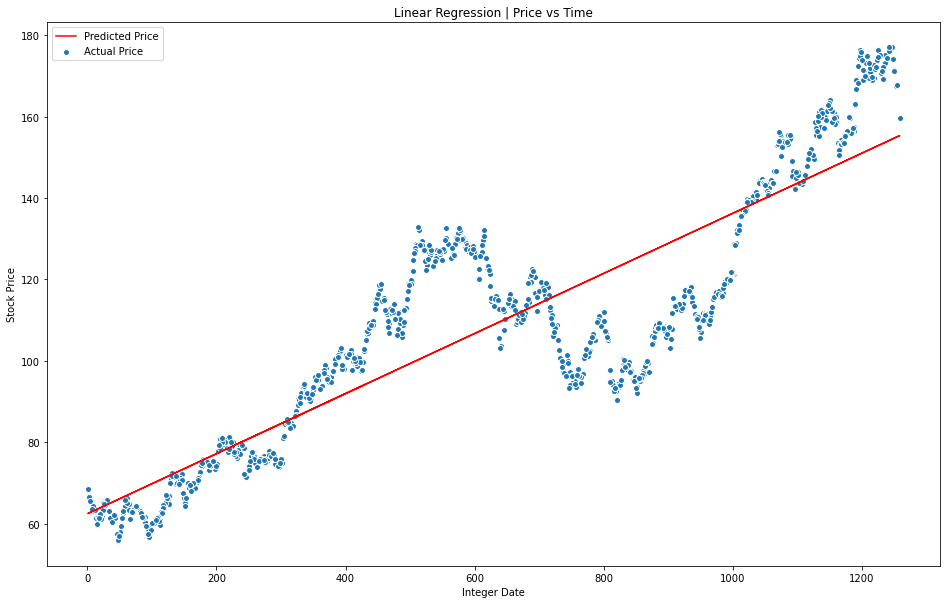

In [45]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [47]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['close']

In [48]:

# Generate array with predicted values
y_pred = model.predict(X_test)

In [49]:
# Get number of rows in data set for random sample
df.shape

(1259, 7)

In [53]:
# Generate 25 random numbers
randints = np.random.randint(1259 , size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [54]:

df_sample.head()

,date,open,high,low,close,volume,Prediction
105,2013-07-11,60.4214,61.1785,60.1671,61.0411,81571665,71.8514
108,2013-07-16,60.9314,61.5299,60.5957,61.4564,54033805,69.7985
116,2013-07-26,62.1857,63.0057,62.0485,62.9985,50031170,72.3099
252,2014-02-10,74.0942,75.9985,73.9999,75.5699,86451022,77.8556
264,2014-02-27,73.8771,75.5399,73.7214,75.3814,75557321,74.7828


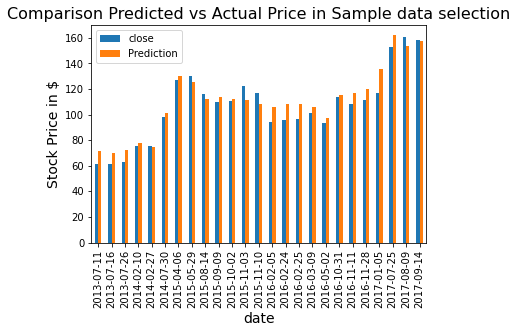

In [57]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='date', y=['close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

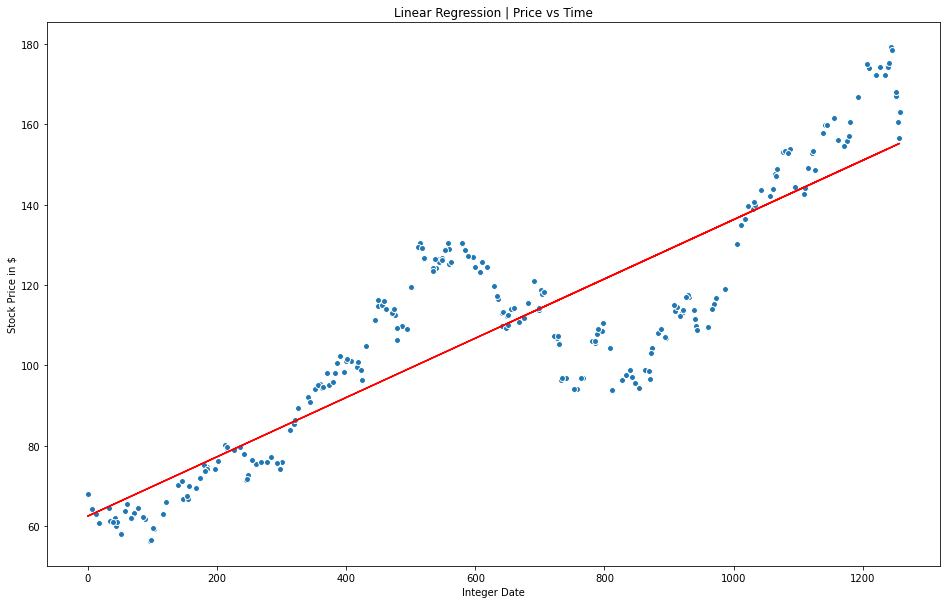

In [58]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()


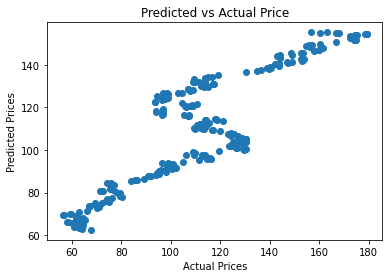

In [59]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

# Residual Histogram


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


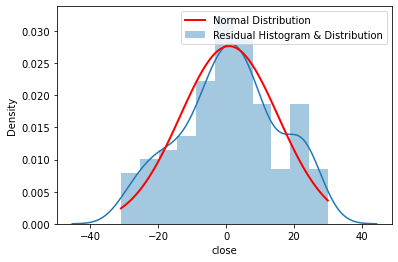

In [66]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [68]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

# Error Evaluation Metrics

In [16]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [17]:
# Statistical summary of test data
df['close'].describe()

count    1259.000000
mean      109.066698
std        30.556812
min        55.789900
25%        84.830650
50%       109.010000
75%       127.120000
max       179.260000
Name: close, dtype: float64

# Calculate and print values of MAE, MSE, RMSE

In [72]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.60495340016309
Mean Squared Error: 208.9376913670418
Root Mean Squared Error: 14.454677145029626
